# Tidy Data Exercise

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('untidy-data/attendance.csv')
df.head()

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


Calculate each student's attendnace grade

In [18]:
grades = {
    'P': 1,
    'H': .5,
    'T': .9,
    'A': 0
}

(
    df.replace(grades)
    .rename(columns={'Unnamed: 0': 'student'})
    .melt(id_vars='student')
    .groupby('student')
    .value.mean()
)

student
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: value, dtype: float64

In [19]:
df.replace(grades)\
    .rename(columns={'Unnamed: 0': 'student'})\
    .melt(id_vars='student')\
    .groupby('student')\
    .value.mean()

student
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: value, dtype: float64

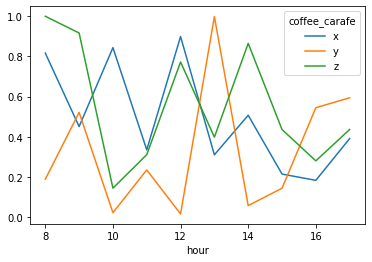

In [24]:
df = pd.read_csv('untidy-data/coffee_levels.csv')
df.pivot_table('coffee_amount', 'hour', 'coffee_carafe').plot()

Put each carafe in it's own column

In [33]:
df = pd.read_csv('untidy-data/cake_recipes.csv')
df = df.melt(id_vars='recipe:position', var_name='temp', value_name='cake_score')
recipe_position = df['recipe:position'].str.split(':', expand=True)
recipe_position.columns = ['recipe', 'position']
df = pd.concat([df, recipe_position], axis=1).drop(columns='recipe:position')
df

,temp,cake_score,recipe,position
0,225,61.738655,a,bottom
1,225,51.709751,a,top
2,225,57.095320,b,bottom
3,225,82.455004,b,top
4,225,96.470207,c,bottom
5,225,71.306308,c,top
6,225,52.799753,d,bottom
7,225,96.873178,d,top
8,250,53.912627,a,bottom
9,250,52.009735,a,top


In [34]:
df.groupby('recipe').cake_score.mean()

recipe
a    63.922201
b    76.736074
c    75.874748
d    62.864844
Name: cake_score, dtype: float64

In [41]:
df.groupby('temp').mean()

,cake_score
temp,
225,71.306022
250,66.577437
275,74.886754
300,66.627655


In [35]:
df.groupby('temp').cake_score.mean()

temp
225    71.306022
250    66.577437
275    74.886754
300    66.627655
Name: cake_score, dtype: float64

In [40]:
df.groupby('temp').cake_score.mean().nlargest(1)

temp
275    74.886754
Name: cake_score, dtype: float64

In [39]:
df.groupby('temp').cake_score.mean().sort_values().tail(1).index

Index(['275'], dtype='object', name='temp')

In [43]:
df.groupby(['recipe', 'position', 'temp']).cake_score.mean().nlargest(1)

recipe  position  temp
b       bottom    300     99.248541
Name: cake_score, dtype: float64

In [ ]:
def sayhello():
    return 'hello, world!'

- Which recipe, on average, is the best? recipe b
- Which oven temperature, on average, produces the best results? 275
- Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

MacOS Keyboard Shortcuts

- ctrl + b: left arrow (backwards)
- ctrl + f: right arrow (forwards)
- ctrl + p: up arrow (previous)
- ctrl + n: down arrow (next)